# Loi de Mariotte


## Problématique
Quel est le comportement d’un gaz lorsque sa pression ou son volume varient ?


## Objectifs
Les gaz sont compressibles, c'est-à-dire que le volume d'une quantité de matière de gaz donnée varie quand sa pression varie.

L'objectif du TP consiste à établir la loi qui relie la pression `P` et le volume `V` d'un gaz.

## Mesures

In [1]:
# Loi de Mariotte
from web_sciences import WebSciences

my_init = '''
mode = "point";
var commandes = [{texte_bouton:"Mesure", arduino:"mesure"}];
series = [{grandeur: "P", unite: "hPa"}];
titre_graphe = "Loi de Mariotte";
axes = [{grandeur: "V", unite: "mL"}, {grandeur: "P", unite: "hPa"}];
'''

interface = WebSciences(my_init)
interface.affiche()

## Exploitation

In [2]:
# Importation des biblothèques et initialisations

from IPython.display import display, Math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# mesures obtenues
# copier ci-dessous les tableaux de valeurs donnés par le notebook loi_mariotte_mesures
V = [60, 55, 50, 45, 40, 35, 30, 25]
P = [1.02e+3, 1.10e+3, 1.20e+3, 1.31e+3, 1.47e+3, 1.64e+3, 1.89e+3, 2.23e+3]

# V en m3
V = [v * 1e-6 for v in V]
# P en Pa
P = [p * 100 for p in P]
# calcul de 1/V
inv_V = [1/v for v in V]

In [3]:
# calcul des incertitudes de type B
# u(V) = 1,0 mL
U_V = [1e-6 for v in V]
# u(P) = 2,0 % * P
U_P = [p * 0.02 for p in P]
# u(1/V) = 1/V**2 * uV                         
U_invV = [1/v**2 * uv for v, uv in zip(V, U_V)]    

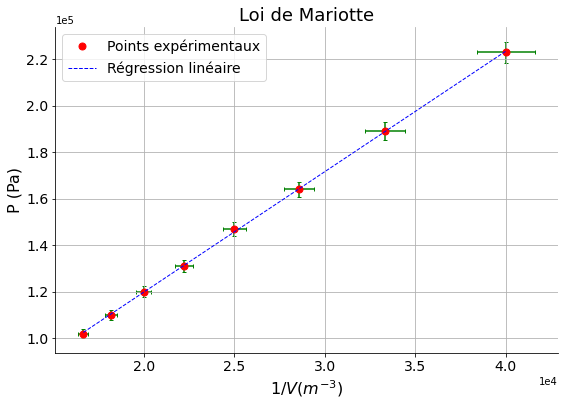

In [4]:
# paramétrage du graphique
plt.figure('Loi de Mariotte', figsize=(9,6))    # Initialise la figure
plt.title('Loi de Mariotte', fontsize = 18)       # Titre du graphe
plt.xlabel('$1/V (m^{-3})$', fontsize = 16)       # Label de l’axe des abscisses
plt.ylabel('P (Pa)', fontsize = 16)               # Label de l’axe des ordonnées
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks(fontsize=14)
plt.ticklabel_format(axis='x', style='scientific', scilimits=(-1,2))
plt.ticklabel_format(axis='y', style='scientific', scilimits=(-1,2))
plt.yticks(fontsize=14)  
Modele = linregress(inv_V, P)
m, p = Modele[0], Modele[1]    
plt.plot(inv_V, P, 'r.', ms=14, label='Points expérimentaux') # Points expérimentaux
plt.plot(inv_V,[m*iv+p for iv in inv_V], 'b--',label='Régression linéaire', lw=1)
plt.errorbar(inv_V, P, xerr = U_invV, yerr = U_P, fmt = 'none', capsize = 2, ecolor = 'green', zorder = 1)
plt.grid()                              
plt.legend(fontsize=14)    
plt.show()

<div class = "alert alert-success">
    
Quelle droite a-t-on tracée?
</div>

**Votre réponse ici**

On a tracé la droite $P =f(\dfrac{1}{V})$

In [ ]:
# Compléter pour afficher le coefficient directeur de la droite
display(Math('m = {:.3f}~Pa.m^3'.format(m)))

<div class = "alert alert-success">
    
Quel est le coefficient directeur de cette droite ?
</div>

**Votre réponse ici**

Le coefficient directeur de cette droite est $m = 5,062~Pa.m^3$

<div class = "alert alert-success">
    
Sachant que la droite passe par l’origine, donner son équation.
</div>

**Votre réponse ici**

L'équation de cette droite est $P = 5,062 \times \dfrac{1}{V}$


## Questions

<div class = "alert alert-success">
    
Exprimer le produit $P \times V$
</div>

**Votre réponse ici**

Le produit $P \times V$ a pour expression $P \times V = 5,062$


<div class = "alert alert-success">
    
En déduire la loi de Mariotte.
</div>

**Votre réponse ici**

D'après la loi de Mariotte, $P \times V = cte$

## Pour aller plus loin

<div class = "alert alert-info">
    
- A l’aide de la première cellule du notebook `loi_mariotte_mesures.ipynb` (`Détermination de k`), en gardant le piston de la seringue immobile, poser la paume de la main sur le cylindre pour chauffer l'air qu'il contient.

- En effectuant plusieurs mesures, observer comment évolue la pression.
</div>

Cette expérience prouve que la constante dépend d'un paramètre au moins. Lequel ?

**Votre réponse ici**

La constante $P \times V$ dépend de la température.